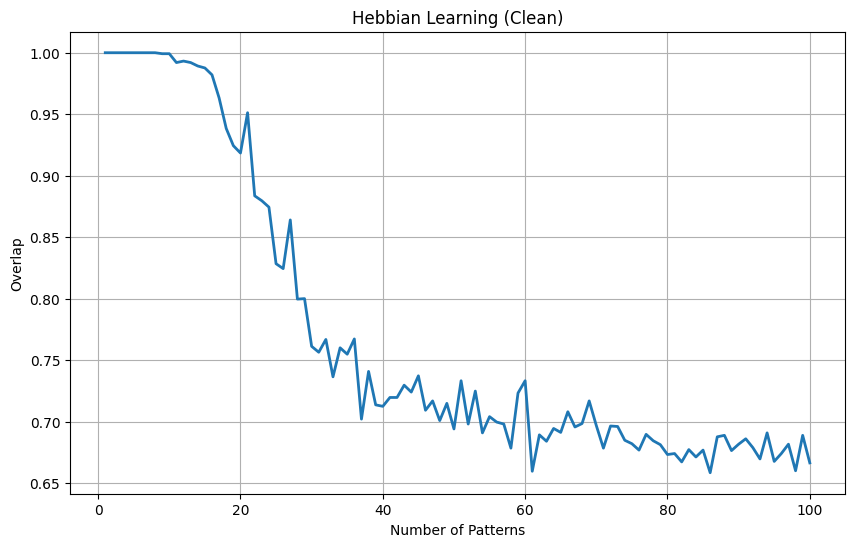

Hebbian Clean: Max Patterns = 17, Alpha = 0.17


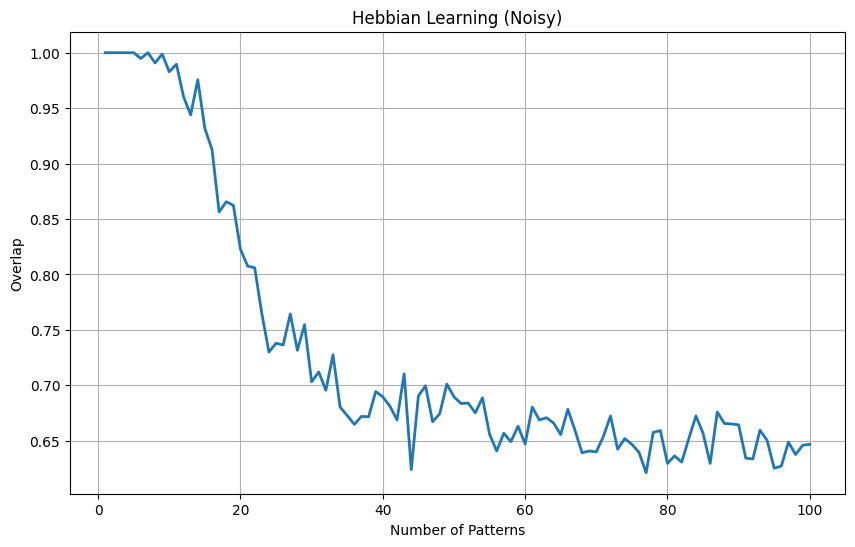

Hebbian Noisy: Max Patterns = 12, Alpha = 0.12


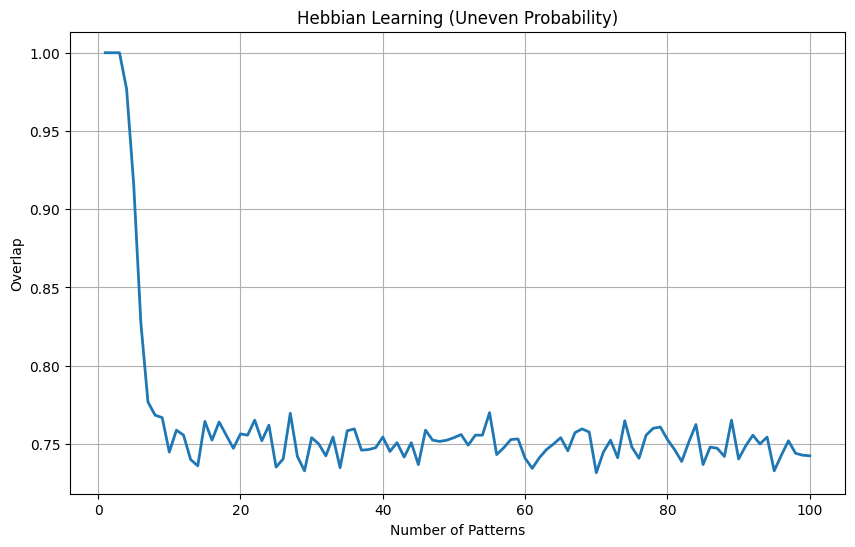

Hebbian Uneven Probability: Max Patterns = 4, Alpha = 0.04


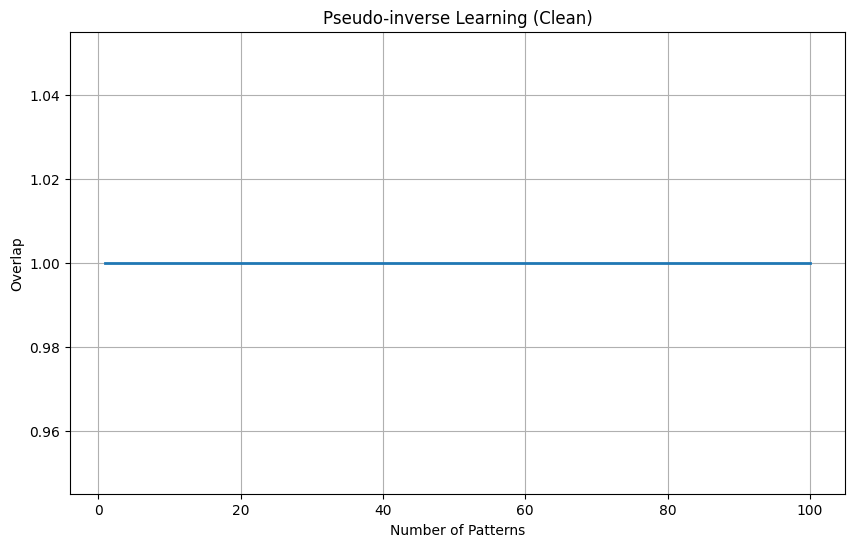

Pseudo-inverse Clean: Max Patterns = 100, Alpha = 1.0


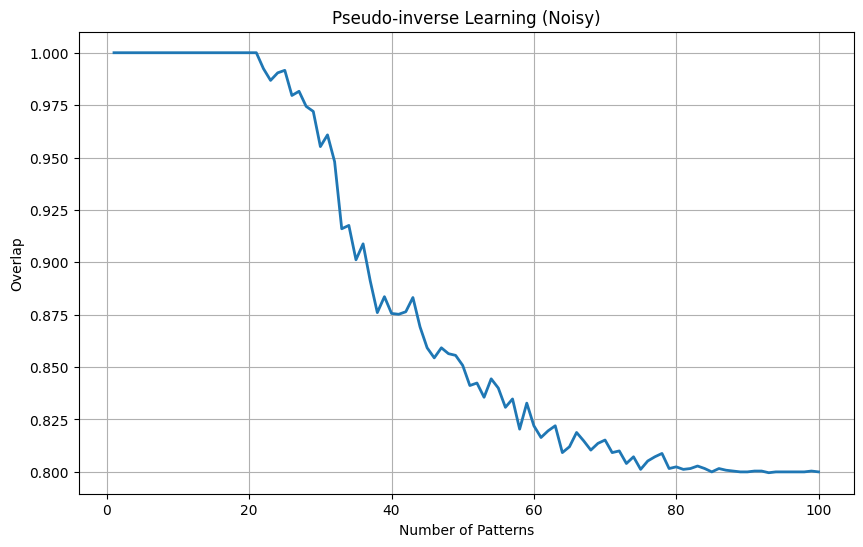

Pseudo-inverse Noisy: Max Patterns = 31, Alpha = 0.31


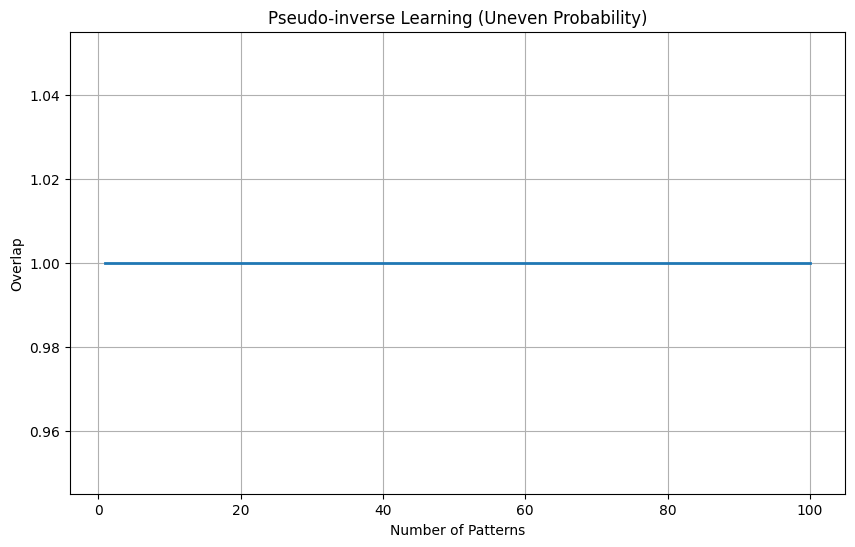

Pseudo-inverse Uneven Probability: Max Patterns = 100, Alpha = 1.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Plots the average overlap vs number of patterns stored in the Hopfield network
# Helps visualize the degradation in memory recall as more patterns are stored
def plot_graph(av_overlaps, S, title):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, S + 1), av_overlaps, linewidth=2)
    plt.xlabel("Number of Patterns")
    plt.ylabel("Overlap")
    plt.title(title)
    plt.grid()
    plt.show()

# Core simulation function for Hopfield network memory recall performance
# Implements either Hebbian or Pseudo-inverse learning rule
# Allows simulation of noisy recall and biased pattern distribution

def run_simulation(S, K, T_max, method='hebbian', noise=False, noise_flip_count=0, prob_dist=[0.5, 0.5]):
    average_overlaps = []  # stores average recall accuracy per pattern count

    for L in range(1, S + 1):  # Iterate over number of patterns to store
        overlaps = []

        for _ in range(K):  # Run K trials per pattern count
            # Generate L bipolar (+1/-1) patterns of length S
            X = np.random.choice([-1, 1], size=(S, L), p=prob_dist)

            # Compute weight matrix using selected training method
            if method == 'hebbian':
                W = X @ X.T
                np.fill_diagonal(W, 0)  # No self-connections
            elif method == 'pseudoinverse':
                X_pinv = np.linalg.pinv(X)
                W = X @ X_pinv
            else:
                raise ValueError("Method must be 'hebbian' or 'pseudoinverse'")

            # Choose one pattern, optionally flip bits for noise
            a_initial = X[:, np.random.randint(L)]  # Randomly pick a stored pattern
            a = a_initial.copy()

            if noise:
                flip_indices = random.sample(range(S), noise_flip_count)
                for i in flip_indices:
                    a[i] *= -1  # Flip sign of selected bits

            # Step through network updates until convergence or max steps
            for _ in range(T_max):
                a_new = np.sign(W @ a)
                a_new[a_new == 0] = 1  # Treat 0 as +1
                if np.array_equal(a_new, a):
                    break  # Converged
                a = a_new

            # Calculate the overlap = percentage of correctly recalled bits
            overlap = np.sum(a_initial == a) / S
            overlaps.append(overlap)

        #Average the K overlaps for this pattern count
        average_overlaps.append(np.mean(overlaps))

    return average_overlaps

# Determines maximum number of patterns with overlap >= threshold (e.g., 0.95)

def find_L_max(overlaps, S, threshold=0.95):
    for index, overlap in enumerate(overlaps):
        if overlap < threshold:
            return index, index / S  # Return max storable L and alpha
    return S, 1.0  # If all patterns are recalled with high accuracy

# === Parameters ===
S = 100       # Number of neurons (pattern dimension)
K = 25        # Number of simulation trials for averaging
T_max = 100   # Max iterations to allow convergence of the network

# === Clean Hebbian Training ===
hebb_clean = run_simulation(S, K, T_max, method='hebbian')
plot_graph(hebb_clean, S, "Hebbian Learning (Clean)")
L_max_hebb_clean, alpha_hebb_clean = find_L_max(hebb_clean, S)
print(f"Hebbian Clean: Max Patterns = {L_max_hebb_clean}, Alpha = {alpha_hebb_clean}")

# === Noisy Hebbian (20% bit flips in recall pattern) ===
hebb_noisy_flip = run_simulation(S, K, T_max, method='hebbian', noise=True, noise_flip_count=20)
plot_graph(hebb_noisy_flip, S, "Hebbian Learning (Noisy)")
L_max_hebb_noisy_flip, alpha_hebb_noisy_flip = find_L_max(hebb_noisy_flip, S)
print(f"Hebbian Noisy: Max Patterns = {L_max_hebb_noisy_flip}, Alpha = {alpha_hebb_noisy_flip}")

# === Biased Hebbian (75% chance of +1, 25% chance of -1) ===
hebb_noisy_uneven = run_simulation(S, K, T_max, method='hebbian', prob_dist=[0.25, 0.75])
plot_graph(hebb_noisy_uneven, S, "Hebbian Learning (Uneven Probability)")
L_max_hebb_noisy_uneven, alpha_hebb_noisy_uneven = find_L_max(hebb_noisy_uneven, S)
print(f"Hebbian Uneven Probability: Max Patterns = {L_max_hebb_noisy_uneven}, Alpha = {alpha_hebb_noisy_uneven}")

# === Clean Pseudo-inverse Training ===
pinv_clean = run_simulation(S, K, T_max, method='pseudoinverse')
plot_graph(pinv_clean, S, "Pseudo-inverse Learning (Clean)")
L_max_pinv_clean, alpha_pinv_clean = find_L_max(pinv_clean, S)
print(f"Pseudo-inverse Clean: Max Patterns = {L_max_pinv_clean}, Alpha = {alpha_pinv_clean}")

# === Noisy Pseudo-inverse ===
pinv_noisy_flip = run_simulation(S, K, T_max, method='pseudoinverse', noise=True, noise_flip_count=20)
plot_graph(pinv_noisy_flip, S, "Pseudo-inverse Learning (Noisy)")
L_max_pinv_noisy_flip, alpha_pinv_noisy_flip = find_L_max(pinv_noisy_flip, S)
print(f"Pseudo-inverse Noisy: Max Patterns = {L_max_pinv_noisy_flip}, Alpha = {alpha_pinv_noisy_flip}")

# === Biased Pseudo-inverse (75% chance of +1, 25% chance of -1) ===
pinv_noisy_uneven = run_simulation(S, K, T_max, method='pseudoinverse', prob_dist=[0.25, 0.75])
plot_graph(pinv_noisy_uneven, S, "Pseudo-inverse Learning (Uneven Probability)")
L_max_pinv_noisy_uneven, alpha_pinv_noisy_uneven = find_L_max(pinv_noisy_uneven, S)
print(f"Pseudo-inverse Uneven Probability: Max Patterns = {L_max_pinv_noisy_uneven}, Alpha = {alpha_pinv_noisy_uneven}")